In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
from statistics import mean
from scipy import stats

### Read in pickled df (made in cleaning)

In [2]:
df = pd.read_pickle("cleaned_df.pkl")
df.head()

,Name,Platform,release_date,summary,meta_score,user_review,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,as young boy link tricked ganondorf king gerud...,99,9.1,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,as most major publishers development efforts s...,98,7.4,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,"metacritic 2008 ps3 game year also known ""gta ...",98,7.7,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
3,SoulCalibur,Dreamcast,1999-09-08,this tale souls swords transcending world hist...,98,8.4,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34
4,Grand Theft Auto IV,Xbox 360,2008-04-29,metacritic 2008 xbox 360 game year also known ...,98,7.9,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02


# Find words/phrases that significantly change Global Sales

### Find most frequent words

In [3]:
# find all unique words in the summaries and select only the ones that appear >200 times
unique = dict(Counter(" ".join(df["summary"]).split()))
unique_copy = unique.copy()
for key in unique_copy:
    if unique_copy[key] <= 200:
        del unique[key]
len(unique) # how many words show up more than 200 times in the summaries

303

In [4]:
# delete words that are specific to one game, platform, or company
delete = ["wii","xbox","sega","nintendo","mario","nfl","ea","ds","nba","sonic"]
for i in delete:
    del unique[i]

In [5]:
# turn into a list
unique = list(unique.keys())

### Find most frequent phrases

In [6]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

finder2 = BigramCollocationFinder.from_words(". ".join(df["summary"]).split())

# only bigrams that appear 50+ times
finder2.apply_freq_filter(50)

# return the 100 n-grams with the highest PMI
bigrams = finder2.nbest(bigram_measures.pmi, 200)

In [7]:
finder3 = TrigramCollocationFinder.from_words(". ".join(df["summary"]).split())

# only bigrams that appear 50+ times
finder3.apply_freq_filter(50)

# return the 100 n-grams with the highest PMI
trigrams = finder3.nbest(bigram_measures.pmi, 100)

In [8]:
# turn them into list of phrases
for i in range(len(trigrams)):
    trigrams[i] = ' '.join(trigrams[i])

for i in range(len(bigrams)):
    bigrams[i] = ' '.join(bigrams[i])

In [9]:
# drop bigrams and trigrams that contain "." because the "." was separating different summaries

trigrams = [item for item in trigrams if "." not in item]
bigrams = [item for item in bigrams if "." not in item]

In [10]:
# join the words and phrases into one list
phrases = unique+bigrams+trigrams

In [11]:
print(trigrams)
print(bigrams)

['dragon ball z', 'never before seen', 'game boy advance', 'player co op', 'single player campaign', 'players assume role', 'new york city', 'first time ever', 'game also features']
['tony hawk', 'united states', 'mortal kombat', 'wi fi', 'tiger woods', 'martial arts', 'harry potter', 'award winning', 'pga tour', 'call duty', 'boy advance', 'xbox 360', 'co op', 'madden nfl', 'x men', 'fast paced', 'metal gear', 'fifa soccer', 'split screen', 'next gen', 'ea sports', 'final fantasy', 'wii remote', 'nintendo ds', 'ball z', 'star wars', 'third person', 'once again', 'next generation', 'touch screen', 'assume role', 'resident evil', 'spider man', 'pac man', 'guitar hero', 'rock band', 'mega man', 'person shooter', 'street fighter', 'dragon ball', 'never before', 'xbox live', 'power ups', 'need speed', 'mini games', 'takes place', 'head head', 'off road', 'wide variety', 'years after', 'nba live', 'before seen', 'york city', 'role playing', 'action packed', 'playable characters', 'single pl

In [12]:
# delete phrases that are specific to one game, platform, or company
delete = ['dragon ball z', 'game boy advance', 'tony hawk', 'mortal kombat', 'harry potter',\
          'pga tour', 'call duty', 'boy advance', 'xbox 360', 'madden nfl', 'x men', 'metal gear',\
          'fifa soccer', 'ea sports', 'final fantasy', 'wii remote', 'nintendo ds', 'ball z',\
          'star wars', 'resident evil', 'spider man', 'pac man', 'guitar hero', 'rock band', 'mega man',\
          'dragon ball', 'xbox live', 'nba live', 'playstation 2', 'psp system', 'game boy']
for i in delete:
    phrases.remove(i)

### Create df of whether or not each game's summary contains each of the frequent words

In [13]:
# create empty df to fill with whether or not each game's summary contains each word
words = pd.DataFrame(df[["Name","Global_Sales"]],columns = ["Name","Global_Sales"]+phrases)

In [14]:
# fill data frame with whether the game contains the word/phrase (T or F)
for i in range(len(df)):
    for j in phrases:
        if j in df["summary"][i]:
            words[j][i] = True
        else:
            words[j][i] = False
words.head()

/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_6582/4110618605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words[j][i] = True
/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_6582/4110618605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words[j][i] = False


,Name,Global_Sales,young,evil,he,his,create,so,help,through,...,players battle,game players,new game,never before seen,player co op,single player campaign,players assume role,new york city,first time ever,game also features
0,The Legend of Zelda: Ocarina of Time,7.60,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,Tony Hawk's Pro Skater 2,4.68,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Grand Theft Auto IV,10.57,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,SoulCalibur,0.34,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Grand Theft Auto IV,11.02,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Create df of average global sales with and without each frequent word

In [15]:
# create df that contains the mean user review of games with and without the words
words_aves = pd.DataFrame(columns = ["word","ave_with","ave_without"])
words_aves["word"] = words.columns[2:] # make each word a row
words_aves.head()
for i in phrases:
    words_aves.loc[words_aves["word"] == i , "ave_with"] = mean(words.Global_Sales[words[i] == True])
    words_aves.loc[words_aves["word"] == i , "ave_without"] = mean(words.Global_Sales[words[i] == False])
    
words_aves["difference"] = words_aves["ave_with"]-words_aves["ave_without"]
words_aves.head()

,word,ave_with,ave_without,difference
0,young,0.610585,0.862181,-0.251596
1,evil,0.621074,0.878719,-0.257645
2,he,0.871862,0.786245,0.085617
3,his,0.865566,0.846984,0.018582
4,create,0.796787,0.862345,-0.065558


### Test for significance - are the average global sales significantly different with and without each word?

In [84]:
# two-sided ttest for each word
# when pvalue small, reject the null hyp that the means are equal
words_aves["pvalue"]=""
for word in words.columns[2:]:
    test = stats.ttest_ind(words["Global_Sales"][words[word]== True], \
                       words["Global_Sales"][words[word]== False])
    words_aves["pvalue"][words_aves["word"]==word] = test.pvalue

/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_6582/2230675143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_aves["pvalue"][words_aves["word"]==word] = test.pvalue


In [85]:
# create column of whether or not significant
words_aves["significant"] = words_aves["pvalue"].map(lambda x: x < .05)
words_aves.head()

,word,ave_with,ave_without,difference,pvalue,significant
0,young,0.610585,0.862181,-0.251596,0.094295,False
1,evil,0.621074,0.878719,-0.257645,0.007181,True
2,he,0.871862,0.786245,0.085617,0.216512,False
3,his,0.865566,0.846984,0.018582,0.770561,False
4,create,0.796787,0.862345,-0.065558,0.418369,False


### Plot the effects of the significant words

Text(0.5, 1.0, 'Significant Words & Phrases')

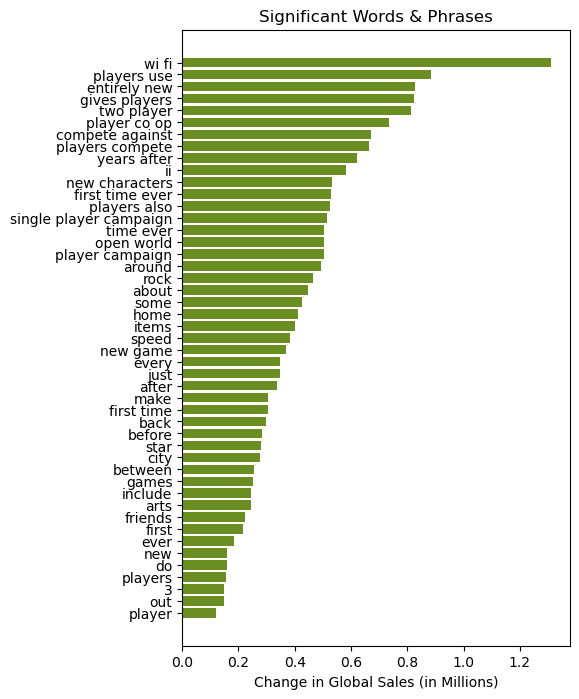

In [86]:
# plot significant words' effects. Positive first
words_sig = words_aves[words_aves["significant"]==True].sort_values("difference")

plt.figure(figsize=(5, 8))
plt.barh(words_sig["word"][words_sig["difference"]>0],words_sig["difference"][words_sig["difference"]>0], \
         color="olivedrab")
plt.xlabel("Change in Global Sales (in Millions)")
plt.title("Significant Words & Phrases")

Text(0.5, 1.0, 'Significant Words & Phrases')

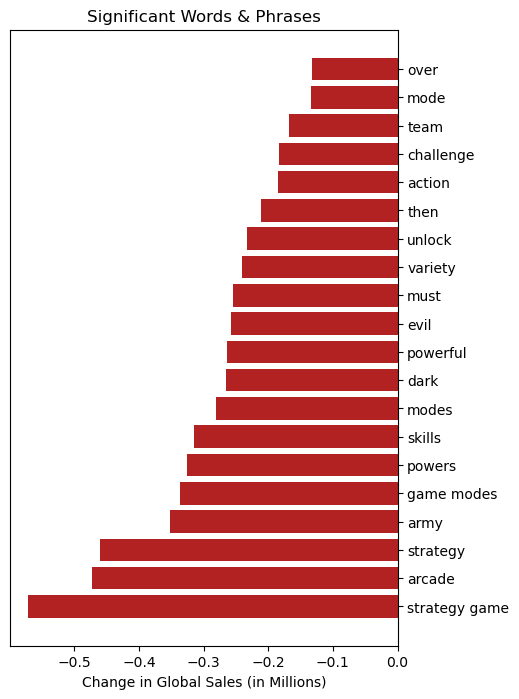

In [87]:
# now plot negative

f = plt.figure(figsize=(5, 8))
ax = f.add_subplot(111)
ax.yaxis.tick_right() # put ticks on rhs
ax=plt.barh(words_sig["word"][words_sig["difference"]<0],words_sig["difference"][words_sig["difference"]<0], \
         color="firebrick")
plt.xlabel("Change in Global Sales (in Millions)")
plt.title("Significant Words & Phrases")

### Create wordcloud of the most frequent words (not just the significant ones)

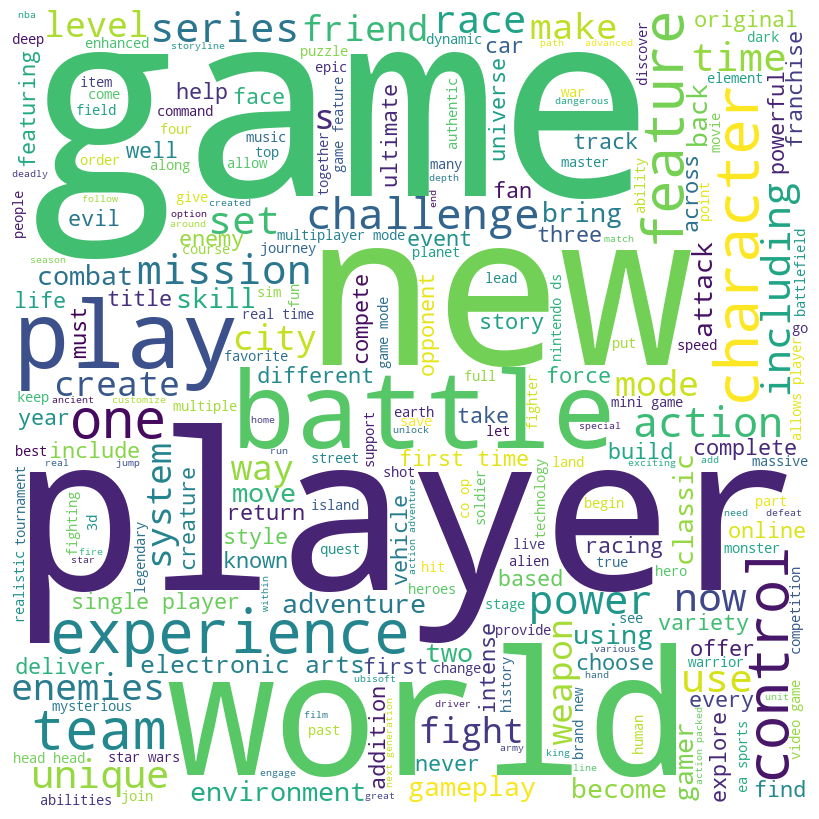

In [20]:
from wordcloud import WordCloud, STOPWORDS
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', max_words=303,
                min_font_size = 10).generate(" ".join(df["summary"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Look at summaries that contained the significant words/phrases

In [110]:
# score each summary by the change in global sales of significant words/phrases in the summary
score = pd.DataFrame(df[["Name","Platform"]],columns = ["Name","Platform","score"])
score["score"] = 0   # all summaries start with score of 0
for i in range(len(df)):
    for j in words_sig["word"]:
        if j in df["summary"][i]:
            score["score"][i] += float(words_sig[words_sig["word"]==j]["difference"])

/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_6582/3554323608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["score"][i] += float(words_sig[words_sig["word"]==j]["difference"])


In [111]:
score = score.sort_values("score") # sort by score
score.head()

,Name,Platform,score
3687,Goblin Commander: Unleash the Horde,PlayStation 2,-1.624689
2366,Battalion Wars,GameCube,-1.590978
984,Psi-Ops: The Mindgate Conspiracy,Xbox,-1.573737
3575,SWAT: Global Strike Team,Xbox,-1.542322
4728,Ninja Assault,PlayStation 2,-1.519650


In [118]:
score.tail()

,Name,Platform,score
5151,Star Wars The Clone Wars: Republic Heroes,PlayStation 3,5.040268
1721,Star Wars: Empire at War,PC,5.171610
4409,Star Wars Battlefront: Elite Squadron,PSP,5.341949
4562,Star Wars Battlefront: Elite Squadron,DS,5.341949
1255,Mario Kart Wii,Wii,9.484787


In [117]:
# Worst score
df[(df["Name"]=="Goblin Commander: Unleash the Horde") & (df["Platform"]=="PlayStation 2")]

,Name,Platform,release_date,summary,meta_score,user_review,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3687,Goblin Commander: Unleash the Horde,PlayStation 2,2003-11-11,in goblin commander unleash horde lead goblin ...,68,8.4,2003,Strategy,Jaleco,0.08,0.07,0.0,0.02,0.17


In [119]:
# Best score
df[(df["Name"]=="Star Wars The Clone Wars: Republic Heroes") & (df["Platform"]=="PlayStation 3")]

,Name,Platform,release_date,summary,meta_score,user_review,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5151,Star Wars The Clone Wars: Republic Heroes,PlayStation 3,2009-10-06,star wars clone wars republic heroes lets star...,43,5.3,2009,Action,LucasArts,0.19,0.19,0.0,0.07,0.46
